In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_epoch_mse
from enkf_functions import enkf_regressor_extension
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
# old settings -> the corresponding model shall be extended
setting_dict = {"particles": 1,
                "epochs": 60,
                "batch_size": 200,    # len(X_train)
                "h_0": 2,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

additional_epochs = 20

In [6]:
particle_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]
particle_list = [1500, 2000]

In [7]:
import time

Epoch 61. Training MSE: 0.276, Test MSE: 0.482.
Epoch 62. Training MSE: 0.274, Test MSE: 0.483.
Epoch 63. Training MSE: 0.272, Test MSE: 0.485.
Epoch 64. Training MSE: 0.27, Test MSE: 0.487.
Epoch 65. Training MSE: 0.268, Test MSE: 0.488.
Epoch 66. Training MSE: 0.266, Test MSE: 0.49.
Epoch 67. Training MSE: 0.265, Test MSE: 0.491.
Epoch 68. Training MSE: 0.263, Test MSE: 0.492.
Epoch 69. Training MSE: 0.261, Test MSE: 0.494.
Epoch 70. Training MSE: 0.26, Test MSE: 0.496.
Epoch 71. Training MSE: 0.258, Test MSE: 0.497.
Epoch 72. Training MSE: 0.257, Test MSE: 0.498.
Epoch 73. Training MSE: 0.255, Test MSE: 0.499.
Epoch 74. Training MSE: 0.254, Test MSE: 0.5.
Epoch 75. Training MSE: 0.253, Test MSE: 0.502.
Epoch 76. Training MSE: 0.252, Test MSE: 0.501.
Epoch 77. Training MSE: 0.25, Test MSE: 0.504.
Epoch 78. Training MSE: 0.249, Test MSE: 0.505.
Epoch 79. Training MSE: 0.248, Test MSE: 0.505.
Epoch 80. Training MSE: 0.247, Test MSE: 0.506.
Calculation time for 1500 particles: 249.75847

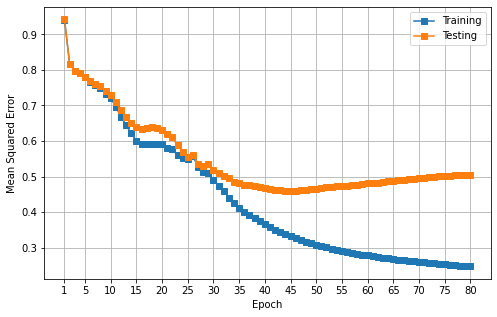

Epoch 61. Training MSE: 0.274, Test MSE: 0.468.
Epoch 62. Training MSE: 0.271, Test MSE: 0.469.
Epoch 63. Training MSE: 0.268, Test MSE: 0.47.
Epoch 64. Training MSE: 0.265, Test MSE: 0.47.
Epoch 65. Training MSE: 0.263, Test MSE: 0.471.
Epoch 66. Training MSE: 0.26, Test MSE: 0.472.
Epoch 67. Training MSE: 0.257, Test MSE: 0.474.
Epoch 68. Training MSE: 0.255, Test MSE: 0.475.
Epoch 69. Training MSE: 0.252, Test MSE: 0.476.
Epoch 70. Training MSE: 0.25, Test MSE: 0.477.
Epoch 71. Training MSE: 0.248, Test MSE: 0.478.
Epoch 72. Training MSE: 0.246, Test MSE: 0.48.
Epoch 73. Training MSE: 0.244, Test MSE: 0.481.
Epoch 74. Training MSE: 0.242, Test MSE: 0.482.
Epoch 75. Training MSE: 0.24, Test MSE: 0.485.
Epoch 76. Training MSE: 0.238, Test MSE: 0.485.
Epoch 77. Training MSE: 0.237, Test MSE: 0.485.
Epoch 78. Training MSE: 0.235, Test MSE: 0.485.
Epoch 79. Training MSE: 0.233, Test MSE: 0.486.
Epoch 80. Training MSE: 0.232, Test MSE: 0.488.
Calculation time for 2000 particles: 369.38861

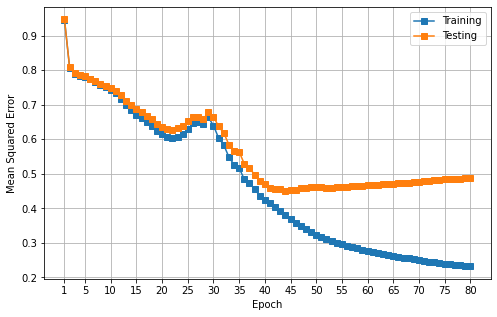

In [8]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()
    mean_model, mean_model_train_mse, mean_model_test_mse = enkf_regressor_extension(extend_model = "../models/wine/enkf_wine_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], p, setting_dict["h_0"]),
                                                                                     additional_epochs = additional_epochs,
                                                                                     save_all = True,
                                                                                     verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_epoch_mse(mean_model_train_mse,
                      mean_model_test_mse,
                      mse_mean = None,
                      savefig = True,
                      file = "../img/wine/enkf_wine_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], p, setting_dict["h_0"]))